Brief description of the data set and a summary of its attributes.


Initial plan for data exploration.


Actions taken for data cleaning and feature engineering..

Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
Formulating at least 3 hypothesis about this data.


Conducting a formal significance test for one of the hypotheses and discuss the results.

Suggestions for next steps in analyzing this data.

A paragraph that summarizes the quality of this data set and a request for additional data if needed.

Dataset is from https://www.kaggle.com/jackdaoud/marketing-data and was provided by Dr. Omar Romero-Hernandez. 


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv("marketing_data.csv")

#### Understanding features:
1. ID -> Customer's unique identifier


2. Year_Birth -> Customer's birth year


3. Education -> Customer's education level


4. Marital_Status -> Customer's marital status


5. Income -> Customer's yearly household income


6. Kidhome -> Number of children in customer's household


7. Teenhome ->Number of teenagers in customer's household


8. Dt_Customer ->Date of customer's enrollment with the company


9. Recency ->Number of days since customer's last purchase


10. MntWines ->Amount spent on wine in the last 2 years


11. MntFruits -> Amount spent on fruits in the last 2 years


12. MntMeatProducts -> Amount spent on meat in the last 2 years


13. MntFishProducts -> Amount spent on fish in the last 2 years


14. MntSweetProducts ->Amount spent on sweets in the last 2 years


15. MntGoldProds -> Amount spent on gold in the last 2 years



16. NumDealsPurchases -> Number of purchases made with a discount



17. NumWebPurchases ->Number of purchases made through the company's web site


18. NumCatalogPurchases ->Number of purchases made using a catalogue


19. NumStorePurchases ->Number of purchases made directly in stores


20. NumWebVisitsMonth ->Number of visits to company's web site in the last month


21. AcceptedCmp3 ->1 if customer accepted the offer in the 3rd campaign, 0 otherwise


22. AcceptedCmp4 -> 1 if customer accepted the offer in the 4th campaign, 0 otherwise


23. AcceptedCmp5 -> 1 if customer accepted the offer in the 5th campaign, 0 otherwise


24. AcceptedCmp1 ->1 if customer accepted the offer in the 1st campaign, 0 otherwise


25. AcceptedCmp2 -> 1 if customer accepted the offer in the 2nd campaign, 0 otherwise


26. Response ->1 if customer accepted the offer in the last campaign, 0 otherwise


27. Complain -> 1 if customer complained in the last 2 years, 0 otherwise


28. Country -> Customer's location



In [26]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [27]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


#### There are 2240  rows and 28  columns present in the dataset

In [36]:
 data.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


By doing .describe() we are able to get summary statistics of the dataset. 
It returns count, mean, std, minimum, and maximum values.

From the above statistical data obtained, we are able to see there are not much of a  difference between mean and median values for customerid and, balance and pdays showed more deviation.


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

By doing .info(), we are able to conclude that the dataset consists of int, and objects

In [30]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

By doing .isnull().sum(), we are able to see that income have 24 null values

In order to remove null values, 

- for Income, we will be using median value and replacing the null values with median values




In [34]:
data.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [109]:
# remove space in table "Income"
dataCopy = data.copy()


#### Cleaning data

In [110]:
dataCopy.rename(columns={' Income ' : 'Income'}, inplace=True)

In [111]:
dataCopy.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [112]:
# remove "$" in income 
dataCopy.Income = dataCopy.Income.str.strip('$')
dataCopy.Income = dataCopy.Income.str.replace(",", "")


In [113]:
# converting object to float
dataCopy["Income"]=dataCopy["Income"].astype("float64")
dataCopy.Income.head()

0    84835.0
1    57091.0
2    67267.0
3    32474.0
4    21474.0
Name: Income, dtype: float64

In [114]:
common=round(dataCopy["Income"].median(),2)
common

51381.5

In [115]:
dataCopy["Income"].fillna(common, inplace=True)

In [116]:
dataCopy.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

- from above we can see that every null values have been removed.

In [117]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [120]:
# convert Dt_Customer object to datetime
dataCopy.Dt_Customer = pd.to_datetime(dataCopy.Dt_Customer)


In [121]:
dataCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

Now as we can see, there are 0 null values and $ have been removed infront of income, income have been converted to float 64 and Dt_Customer have been converted from string to datetime, therefore we can proceed into making some visualisations in the data.

#### useful data that can be engineered:
- useful variables that can be engineered: 
1. determine no of married people who became a customer
2. determine Educational level present
3. determine which marketing campaign was the most successful

- viewing anomalities in the data by using correlation heatmaps

#### exploring data:
using:
1. heatmaps -> to find correlations: understand relationship between variables and attributes in datasets

#### univariate analysis: -> no defined order

1. barplots -> Analysing Education

In [153]:
# calculating percentage of each education status category
dataCopy.Education.value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

<AxesSubplot:>

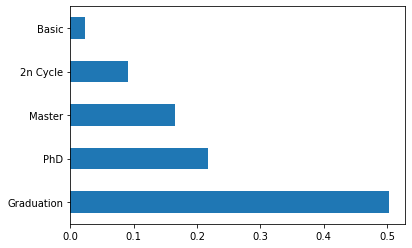

In [154]:
# ploting bar graph as a percentage of education categories
dataCopy.Education.value_counts(normalize=True).plot.barh()

Findings:
From the above we can see that there are more graduates than any other

In [128]:
correlation = data.corr()

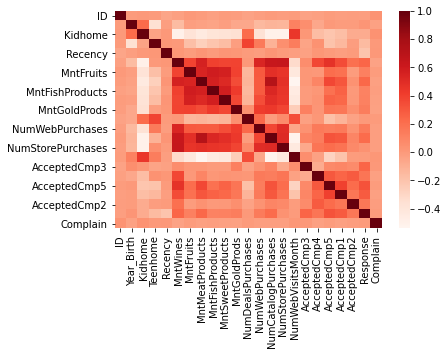

In [127]:
sns.heatmap((correlation), annot=False, cmap='Reds')
plt.show()

- redder: positively correlated
- otherwise: negatively correlated [white]

Findings:
- Number of purchases made throughtout company website against wine purchase was high
- Number of purchases made throughout company website against meat purchase was high
- People who have kids at home bought less over past few days [recency against kids at home]
- Fruit purchase over company's website was less


 building a histogram to view accepted campaigns - plotbar

<AxesSubplot:>

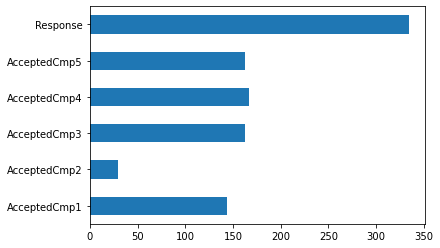

In [144]:
dataCopy[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum().plot.barh()

The bar plot shows more people accepted the offer in the last campaign than the other ones

Marital_Status against customerid

In [147]:
# numeric-categorical analysis

dataCopy.groupby('Marital_Status')['ID'].mean()

Marital_Status
Absurd      6051.500000
Alone       2728.333333
Divorced    5427.060345
Married     5633.152778
Single      5489.241667
Together    5644.674138
Widow       5969.558442
YOLO        5812.500000
Name: ID, dtype: float64

In [148]:
dataCopy.groupby('Marital_Status')['ID'].median()

Marital_Status
Absurd      6051.5
Alone        433.0
Divorced    5324.5
Married     5539.5
Single      5210.5
Together    5523.0
Widow       6878.0
YOLO        5812.5
Name: ID, dtype: float64

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


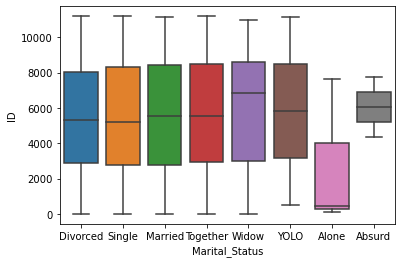

In [150]:
# box plot to check the above behaviour

sns.boxplot(dataCopy.Marital_Status, dataCopy.ID)
plt.show()

Findings:

- Alone: less people living alone became a customer

#### formulating hypothesis testing
1. determine Educational level present
2. determine Marital_Status [mean and median]
3. determine total number of people that accepted the campaign

- viewing anomalities in the data by using correlation heatmaps

In [152]:
from scipy import stats
import math
from scipy.stats import binom

#### Qu 1:  People of different Marital_Status: single, divorced, and hence forth could be a customer.
Hypothesis:
- Alone people are makes up at most of the customers.
alonePeople < customers

#### Qu 2: There could be people of different educational level that are customers.
Hypothesis:
- More graduates than forms part of the customers 

#### Qu 3: A campaign were made for customers to promote the market place
Hypothesis:
- The last campaign[Response] was the most attended.

#### Qu 4: customers that comes probably have kids at home.
hypothesis: no of customsers having kids at home

##### Hypothesis testing on question 1.


In [164]:
# h0 => aloneCustomer < totalCustomer
# h1 => aloneCustomer >= totalCustomer



In [182]:
from scipy.stats import ttest_ind
from scipy import stats


In [178]:
# group single
single = dataCopy.query('Marital_Status == "Single"')["ID"]
single

1          1
4       5371
5       7348
18      1473
19      2795
        ... 
2200    9771
2202     213
2211    9706
2218    4974
2226    1743
Name: ID, Length: 480, dtype: int64

In [179]:
# group married
married = dataCopy.query('Marital_Status == "Married"')["ID"]
married

2       10476
6        4073
8        4047
9        9477
10       2079
        ...  
2229     2106
2230     3363
2236     5263
2238      528
2239     4070
Name: ID, Length: 864, dtype: int64

In [186]:
# doing t-test using Scipy

result = stats.ttest_ind(single, married, equal_var=True)
result

Ttest_indResult(statistic=-0.7756382165811058, pvalue=0.4380992883011331)

The above tell us that we have a z value -0.776(3 significance figures) and a p vlaue of 0.438 (3 significance figures).

however if p<0.05, we say that, we reject null hypothesis

#### suggestions for next step:

- view how the different customers attend to different market places and how much they'd rather spend